<a href="https://colab.research.google.com/github/vishnusureshperumbavoor/colab_playground/blob/main/yolo_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics onnxruntime-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.5/300.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.8 MB/s eta 0:00:00


In [ ]:
import cv2
from pathlib import Path
from ultralytics import YOLO
from PIL import Image
from google.colab.patches import cv2_imshow

IMAGE_URL = "https://storage.openvinotoolkit.org/repositories/openvino_notebooks/data/data/image/coco_bike.jpg"
IMAGE_PATH = "coco_bike.jpg"

import requests
with open(IMAGE_PATH, "wb") as f:
    f.write(requests.get(IMAGE_URL).content)

print(f"Image downloaded to {IMAGE_PATH}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Image downloaded to coco_bike.jpg


## yolo11n-seg.pt


image 1/1 /content/coco_bike.jpg: 480x640 3 bicycles, 2 cars, 1 motorcycle, 1 dog, 626.5ms
Speed: 11.9ms preprocess, 626.5ms inference, 72.9ms postprocess per image at shape (1, 3, 480, 640)


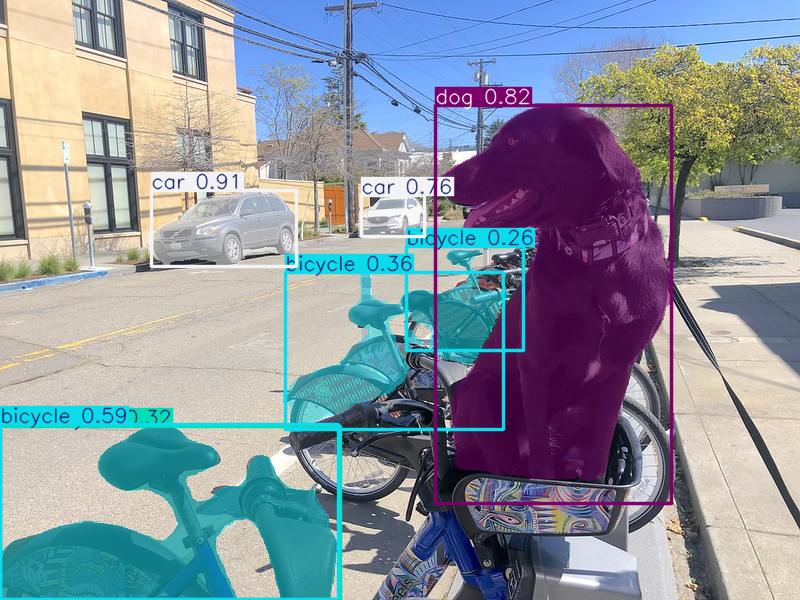

In [ ]:
model = YOLO("yolo11n-seg.pt")

results = model(IMAGE_PATH)

res = results[0]
plot_bgr = res.plot() # Returns a BGR numpy array
plot_rgb = cv2.cvtColor(plot_bgr, cv2.COLOR_BGR2RGB)

display(Image.fromarray(plot_rgb))

In [ ]:
path = model.export(format="onnx", dynamic=True)

print(f"ONNX model saved at: {path}")

Ultralytics 8.3.244 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (AMD EPYC 7B12)

PyTorch: starting from 'yolo11n-seg.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 116, 8400), (1, 32, 160, 160)) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<2.0.0', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 208ms
Prepared 4 packages in 1.48s
Installed 4 packages in 269ms
 + colorama==0.4.6
 + onnx==1.20.0
 + onnxruntime==1.23.2
 + onnxslim==0.1.81

requirements: AutoUpdate success ✅ 2.6s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.20.0 opset 22...


/usr/local/lib/python3.12/dist-packages/torch/onnx/_internal/torchscript_exporter/utils.py:1447: OnnxExporterWarning: Exporting to ONNX opset version 22 is not supported. by 'torch.onnx.export()'. The highest opset version supported is 20. To use a newer opset version, consider 'torch.onnx.export(..., dynamo=True)'. 
  warnings.warn(


ONNX: slimming with onnxslim 0.1.81...
ONNX: export success ✅ 6.5s, saved as 'yolo11n-seg.onnx' (11.7 MB)

Export complete (6.9s)
Results saved to /content
Predict:         yolo predict task=segment model=yolo11n-seg.onnx imgsz=640  
Validate:        yolo val task=segment model=yolo11n-seg.onnx imgsz=640 data=/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
ONNX model saved at: yolo11n-seg.onnx


## yolo11n-seg.onnx

Loading yolo11n-seg.onnx for ONNX Runtime inference...
Using ONNX Runtime 1.23.2 with CPUExecutionProvider

image 1/1 /content/coco_bike.jpg: 480x640 3 bicycles, 2 cars, 1 motorcycle, 1 dog, 145.7ms
Speed: 2.4ms preprocess, 145.7ms inference, 15.3ms postprocess per image at shape (1, 3, 480, 640)


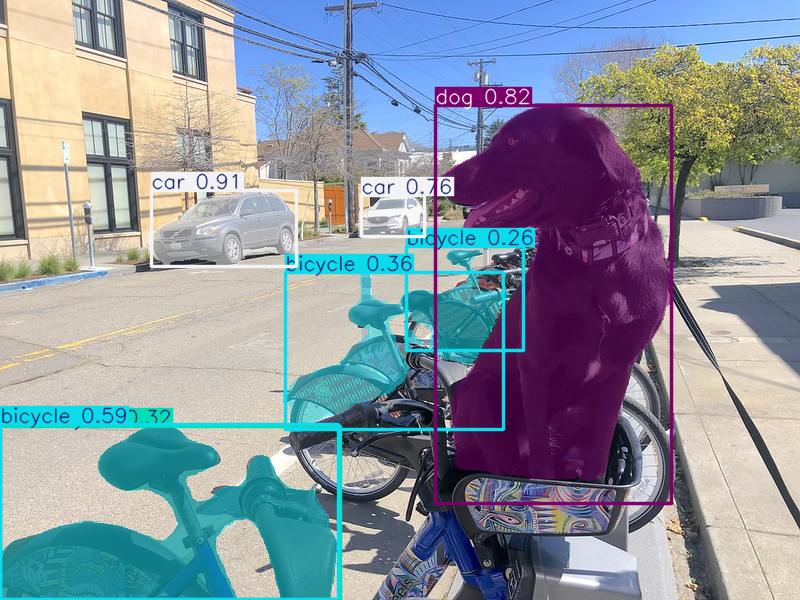

In [ ]:
onnx_model = YOLO("yolo11n-seg.onnx", task="segment")

with open(IMAGE_PATH, "wb") as f:
    f.write(requests.get(IMAGE_URL).content)

results = onnx_model(IMAGE_PATH)

res = results[0]
plot_bgr = res.plot()
plot_rgb = cv2.cvtColor(plot_bgr, cv2.COLOR_BGR2RGB)

display(Image.fromarray(plot_rgb))

## yoloe-11s-seg.pt


Found https://gst-contracts.s3.ap-southeast-1.amazonaws.com/uploads/bcc/cms/asset/avatar/324800/banner6.jpg locally at banner6.jpg
image 1/1 /content/banner6.jpg: 320x640 1 bus, 259.2ms
Speed: 1.3ms preprocess, 259.2ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)


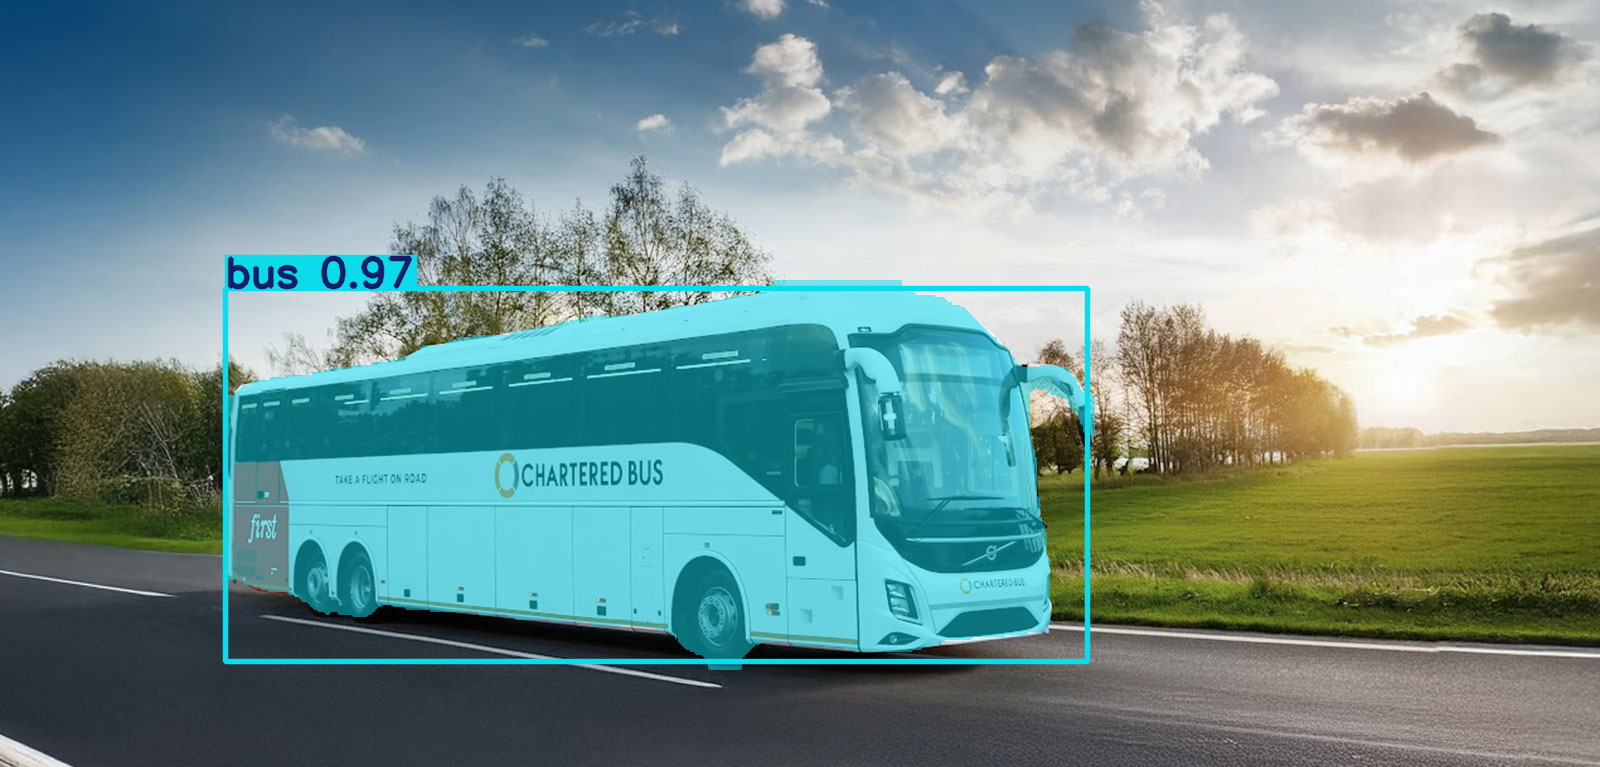

In [ ]:
from ultralytics import YOLOE

# Initialize a YOLOE model
model = YOLOE("yoloe-11s-seg.pt")

# Set text prompt to detect person and bus.
names = ["person", "bus"]
model.set_classes(names, model.get_text_pe(names))

# Run detection on the given image
results = model.predict("https://gst-contracts.s3.ap-southeast-1.amazonaws.com/uploads/bcc/cms/asset/avatar/324800/banner6.jpg")

results[0].show()

## yolov8s-world.pt

100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 76.8MiB/s]



Found https://gst-contracts.s3.ap-southeast-1.amazonaws.com/uploads/bcc/cms/asset/avatar/324800/banner6.jpg locally at banner6.jpg
image 1/1 /content/banner6.jpg: 320x640 1 bus, 261.3ms
Speed: 2.0ms preprocess, 261.3ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)


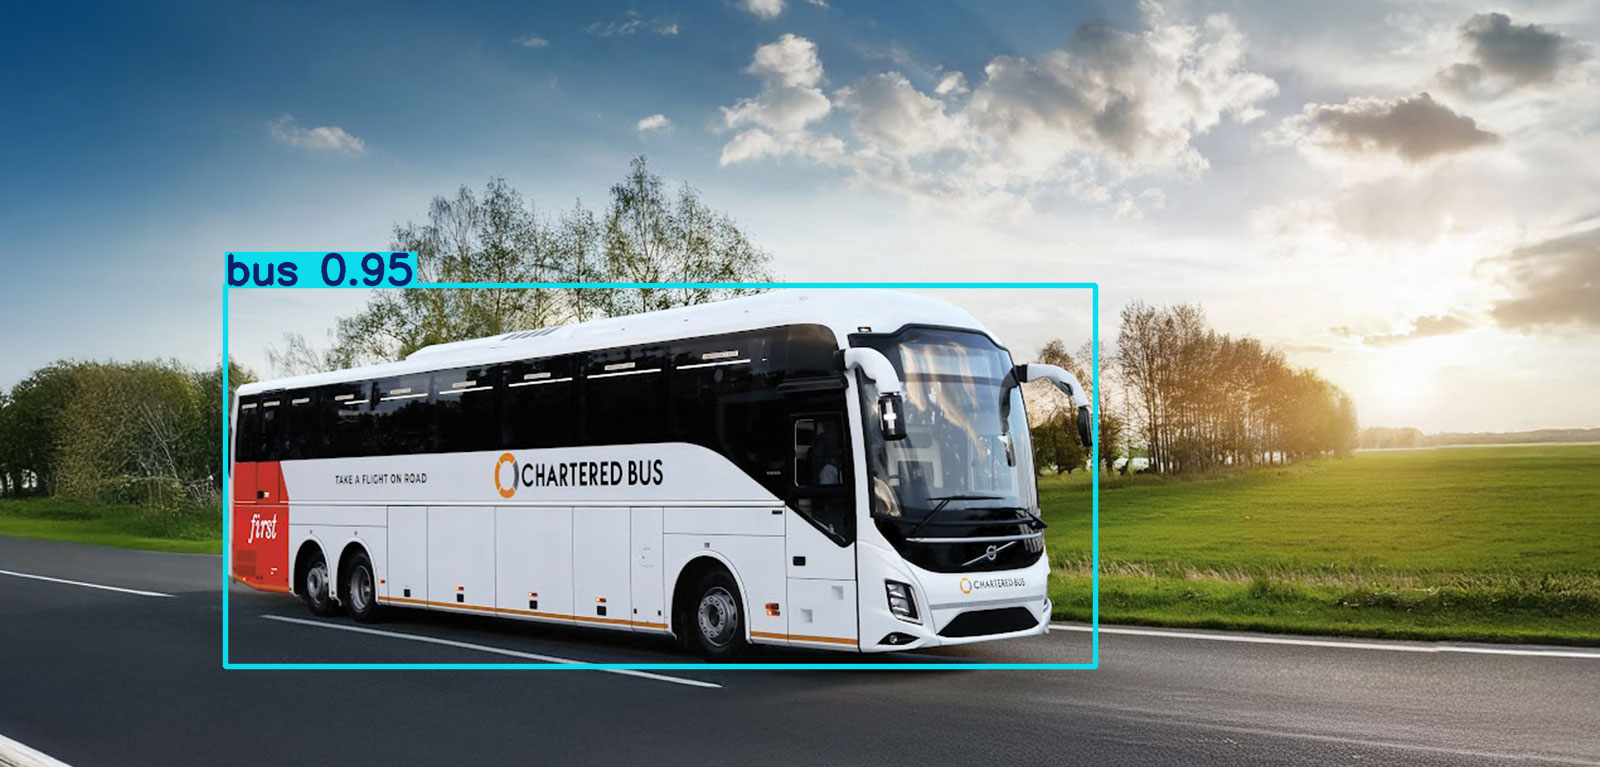

In [ ]:
model = YOLO("yolov8s-world.pt")  # or choose yolov8m/l-world.pt

# Define custom classes
model.set_classes(["person", "bus"])

# Execute prediction for specified categories on an image
results = model.predict("https://gst-contracts.s3.ap-southeast-1.amazonaws.com/uploads/bcc/cms/asset/avatar/324800/banner6.jpg")

# Show results
results[0].show()